In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

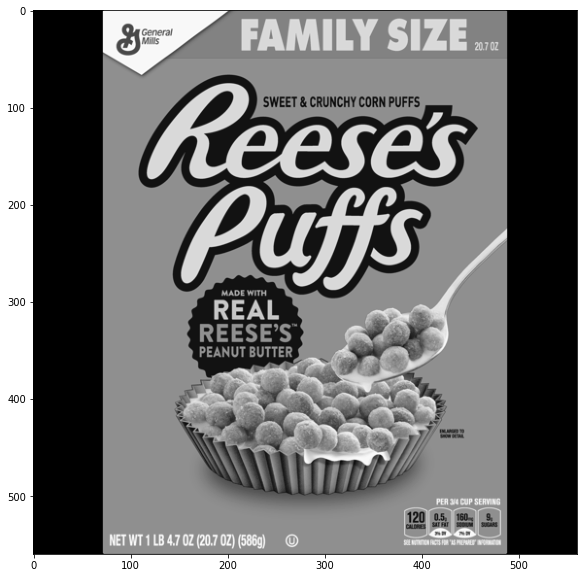

In [4]:
reeses = cv2.imread('../DATA/reeses_puffs.png', 0)
display(reeses)

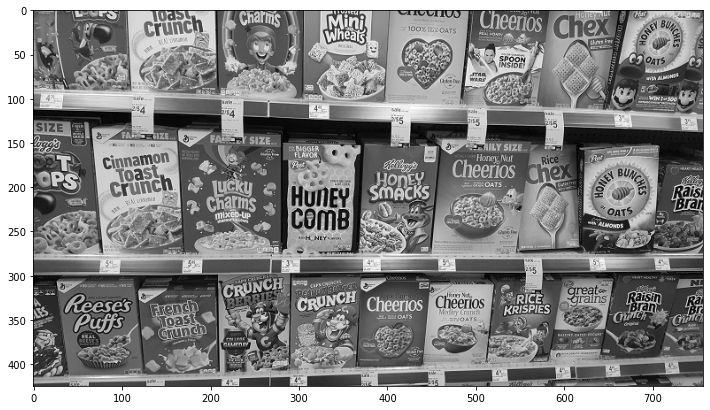

In [5]:
cereals = cv2.imread('../DATA/many_cereals.jpg', 0)
display(cereals)

In [6]:
sift = cv2.xfeatures2d.SIFT_create()

In [7]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [15]:
### Create FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

In [16]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [17]:
matches = flann.knnMatch(des1, des2, k = 2)

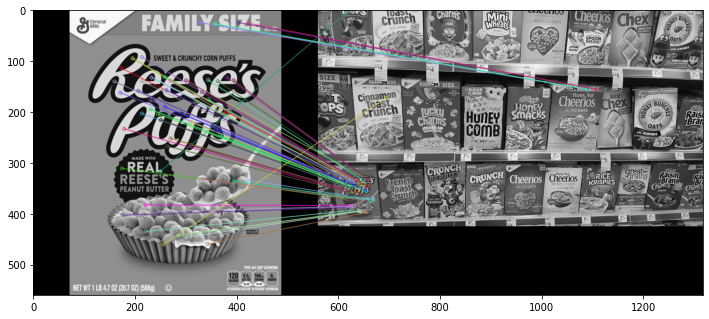

In [20]:
good = []

for match1, match2 in matches:
    if match1.distance < 0.7* match2.distance:
        good.append([match1])
        
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)
display(flann_matches)

In [21]:
sift = cv2.xfeatures2d.SIFT_create()

In [22]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [23]:
### Create FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

In [24]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [26]:
matches = flann.knnMatch(des1, des2, k = 2)

In [30]:
matchesMask = [[0, 0] for i in range(len(matches))]

In [31]:
for i, (match1, match2) in enumerate(matches):
    if match1.distance < 0.7* match2.distance:
        matchesMask[i] = [1,0]

In [39]:
draw_params = dict(matchColor = (0, 255, 0),
                  singlePointColor = (255, 0, 0),
                  matchesMask = matchesMask,
                  flags = 0
                  )

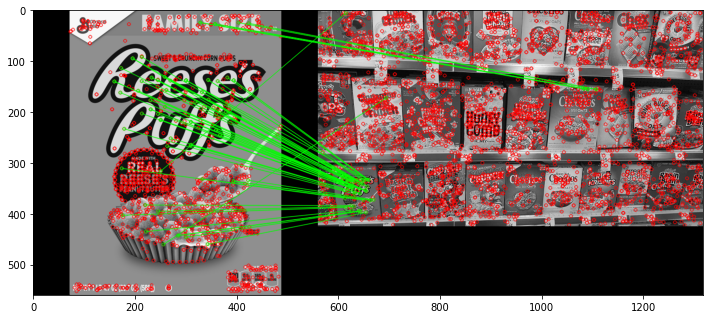

In [40]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)
display(flann_matches)